In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics as sm
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from __future__ import print_function
import subprocess
import os

iris = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

iris.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris.dropna(how="all", inplace=True) # drops the empty line at file-end

iris.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
print("* iris.head()", iris.head(), sep="\n", end="\n\n")
print("* iris.tail()", iris.tail(), sep="\n", end="\n\n")

* iris.head()
   sepal_len  sepal_wid  petal_len  petal_wid        class
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa

* iris.tail()
     sepal_len  sepal_wid  petal_len  petal_wid           class
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica



In [4]:
iris["class"].head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [5]:
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#Change classes to numbers
targets = iris["class"].unique()
map_to_int = {name: n for n, name in enumerate(targets)}
iris["Target"] = iris["class"].replace(map_to_int)

In [7]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [9]:
iris[:4].head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0


In [10]:
features = list(iris.columns[:4])

In [11]:
features

['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

# Fitting the decision tree with scikit-learn

Now we can fit the decision tree, using the DecisionTreeClassifier imported above, as follows:

In [12]:
y = iris["Target"]
X = iris[features]
dt = DecisionTreeClassifier(min_samples_split=20)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [13]:
iris["Target"].head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

Notes:

We pull the X and y data from the pandas dataframe using simple indexing.
The decision tree, imported at the start of the post, is initialized with two parameters: min_samples_split=20 requires 20 samples in a node for it to be split (this will make more sense when we see the result) and random_state=99 to seed the random number generator.

## Visualizing with WEBGRAPHVIZ

This below produces a .dot file that can be used to visualize the tree in

http://webgraphviz.com/

In [14]:
with open("dt1.dot", "w") as f:
    export_graphviz(dt, out_file=f,
                        feature_names=features)

## Prediction

In [15]:
dt.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [29]:
iris["Prediction"]=dt.predict(X)

In [17]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,Target,Prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [18]:
iris.Prediction.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

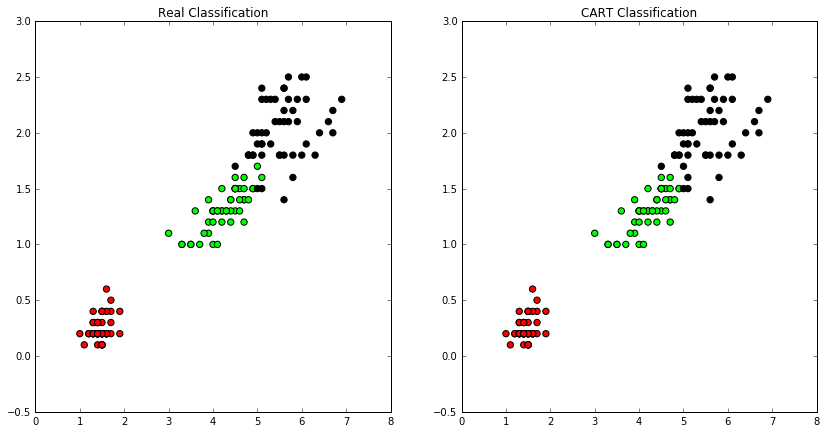

In [23]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.petal_len, X.petal_wid, c=colormap[iris.Target], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.petal_len, X.petal_wid, c=colormap[iris.Prediction], s=40)
plt.title('CART Classification')

In [30]:
sm.accuracy_score(iris.Target, iris.Prediction)

0.97999999999999998